In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Autocompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

In [174]:
con = sa.create_engine('sqlite:///../Datos_Madrid_2024/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head(5)

level_0  index                   id  \
0        0      0   902671779171769624   
1        1      1              9753808   
2        2      2             46899002   
3        3      3  1125891241820979969   
4        4      4             49895335   

                                           name    host_id  \
0                 Habitación centro de Madrid 4   50080380   
1                              Habitación cuqui   41563621   
2          Habitación Doble con Baño Compartido  331096767   
3  SB18-04 Habitación  área exclusiva de Madrid  567327895   
4                                         Teste   86662970   

     neighbourhood_group      neighbourhood   latitude  longitude  \
0                 Centro             Cortes  40.411812  -3.697614   
1                 Centro        Embajadores  40.410970  -3.698240   
2  San Blas - Canillejas              Rejas  40.444300  -3.565950   
3                 Centro            Palacio  40.408240  -3.713480   
4          Ciudad Lineal  San Juan Bautista  40.453560  -3.656380   

      room_type  price  minimum_nights  calculated_host_listings_count  \
0  Private room     77               7                              17   
1  Private room     54               1                               1   
2  Private room     55               1                               4   
3  Private room     69               7                              95   
4  Private room    200               1                               1   

   availability_365                                        description  \
0                 0  Enjoy the simplicity of this quiet, central home.   
1                 0                                       Student Room   
2                 0                                    Sin descripción   
3                 0                                    Sin descripción   
4               365                                    Sin descripción   

  host_is_superhost  accommodates  bedrooms  beds  number_of_reviews  \
0                 f             2         1   1.0                  3   
1                 f             1         1   1.0                  1   
2                 f             2         1   1.0                  0   
3                 f             1         1   1.0                  0   
4                 f             2         1   1.0                  0   

   review_scores_rating  review_scores_communication  review_scores_location  \
0                   4.0                         4.67                     5.0   
1                   5.0                         5.00                     5.0   
2                   NaN                          NaN                     NaN   
3                   NaN                          NaN                     NaN   
4                   NaN                          NaN                     NaN   

   precio_m2               distrito  precio_total  ocupacion bedrooms_disc  \
0       6594                 Centro          77.0        100        01_Una   
1       6594                 Centro          54.0        100        01_Una   
2       3194  San Blas - Canillejas          55.0        100        01_Una   
3       6594                 Centro          69.0        100        01_Una   
4       4002          Ciudad Lineal         200.0          0        01_Una   

  accommodates_disc beds_disc number_of_reviews_disc  m2  precio_compra  \
0               0-3         1                    1-4  50       230790.0   
1               0-3         1                    1-4  50       230790.0   
2               0-3         1                    1-4  50       111790.0   
3               0-3         1                    1-4  50       230790.0   
4               0-3         1                    1-4  50       140070.0   

     pdi_sol  
0   0.730748  
1   0.772384  
2  12.029456  
3   1.276272  
4   5.708538

Lo dificil es siempre empezar. ¿Por dónde empiezo? Por eso es importante las preguntas semilla. Orientaremos nuestro análisis con nuestras palancas y preguntas semilla.

In [175]:
#Analizamos precio total
df.precio_total.describe()

count    24910.000000
mean       105.098037
std         64.184195
min         25.000000
25%         58.800000
50%         98.000000
75%        137.000000
max       4410.000000
Name: precio_total, dtype: float64

Voy a verificar si hay sesgo comparando la media y la mediana. Si son similares, usa la media; si no, usa la mediana.

In [176]:
import scipy.stats as stats

Media: 105.09803693295865
Mediana: 98.0
Desviación típica: 64.18419476539582
Asimetría: 13.426136657969902


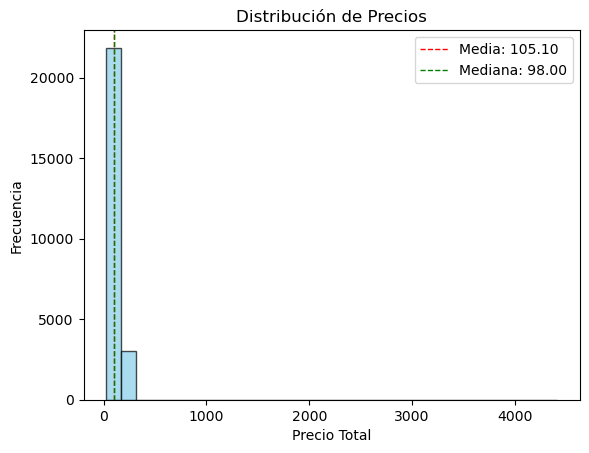

In [177]:
# Calcular media, mediana y desviación estándar
media = df['precio_total'].mean()
mediana = df['precio_total'].median()
desviacion = df['precio_total'].std()

# Calcular asimetría
asimetria = stats.skew(df['precio_total'])

# Mostrar resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación típica: {desviacion}")
print(f"Asimetría: {asimetria}")

# Visualizar la distribución
plt.hist(df['precio_total'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.legend()
plt.title("Distribución de Precios")
plt.xlabel("Precio Total")
plt.ylabel("Frecuencia")
plt.show()

**La asimetría de 13.43 sugiere que la distribución está muy sesgada hacia la derecha (cola larga en valores altos)**. Esto ocurre porque hay algunos valores extremos (muy altos) que están influyendo en el cálculo de la media.

Aunque la media (105.10 €) y la mediana (98.00 €) no son drásticamente diferentes, la media está siendo un poco influenciada por los valores extremos. Esto puede ser más evidente en distribuciones con menor dispersión.

En este caso, es mejor usar la **mediana** como medida de tendencia central, ya que es más robusta frente a los valores extremos y representa mejor el precio típico para la mayoría de los datos.

In [178]:
df.precio_total.median()

98.0

In [179]:
df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
Salamanca                115.5
Centro                   115.0
Chamberí                 113.0
Chamartín                111.0
Retiro                   103.0
Tetuán                    93.0
Arganzuela                89.0
Moncloa - Aravaca         88.5
Hortaleza                 80.0
Fuencarral - El Pardo     78.0
Ciudad Lineal             71.0
San Blas - Canillejas     70.5
Barajas                   61.6
Puente de Vallecas        60.0
Carabanchel               60.0
Usera                     57.0
Villa de Vallecas         57.0
Latina                    53.0
Villaverde                53.0
Vicálvaro                 44.5
Moratalaz                 39.0
Name: precio_total, dtype: float64

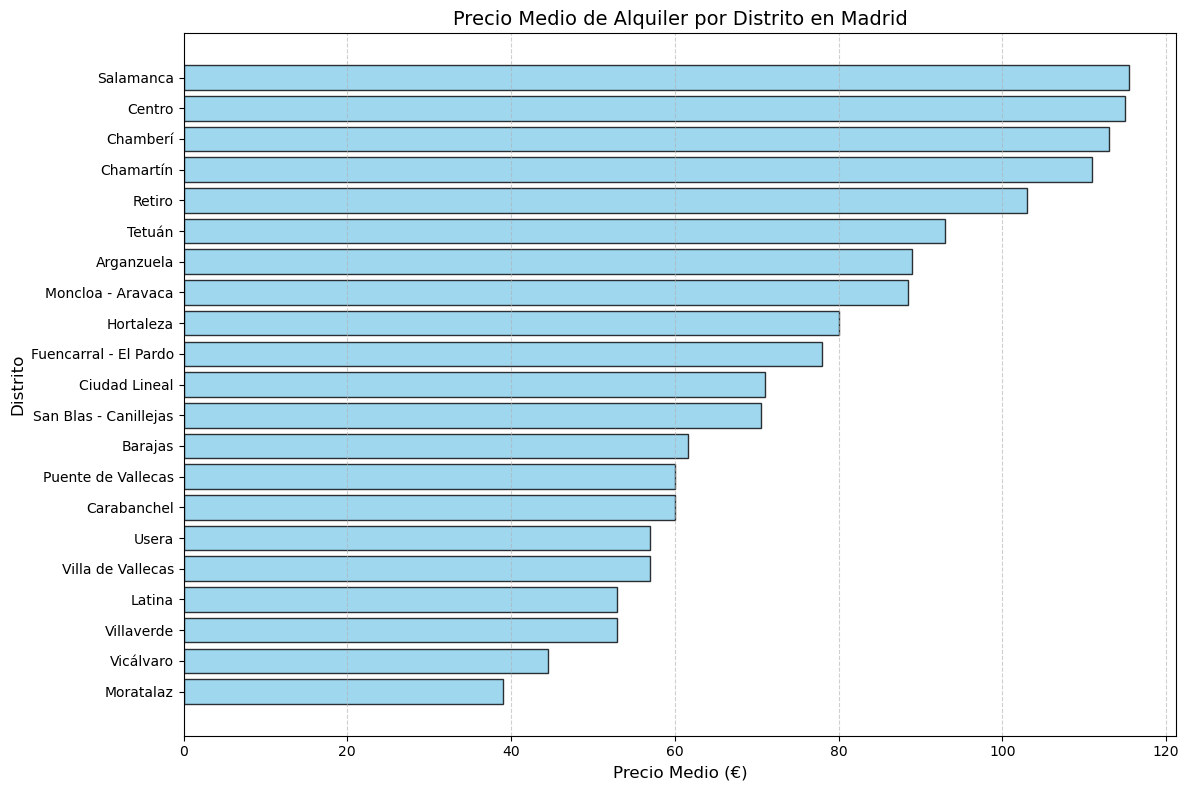

In [180]:
# Datos del precio medio por distrito
distritos = [
    "Salamanca", "Centro", "Chamberí", "Chamartín", "Retiro", "Tetuán", 
    "Arganzuela", "Moncloa - Aravaca", "Hortaleza", "Fuencarral - El Pardo", 
    "Ciudad Lineal", "San Blas - Canillejas", "Barajas", "Puente de Vallecas", 
    "Carabanchel", "Usera", "Villa de Vallecas", "Latina", "Villaverde", 
    "Vicálvaro", "Moratalaz"
]

precios = [
    115.5, 115.0, 113.0, 111.0, 103.0, 93.0, 89.0, 88.5, 80.0, 78.0, 71.0, 
    70.5, 61.6, 60.0, 60.0, 57.0, 57.0, 53.0, 53.0, 44.5, 39.0
]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(distritos, precios, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Precio Medio (€)", fontsize=12)
plt.ylabel("Distrito", fontsize=12)
plt.title("Precio Medio de Alquiler por Distrito en Madrid", fontsize=14)
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el más caro arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Veremos si hay relaciones dispares entre **precio de alquiler y precio de compra.**

In [181]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

precio_total  precio_compra
distrito                                          
Arganzuela                     89.0       177170.0
Barajas                        61.6       136535.0
Carabanchel                    60.0       101115.0
Centro                        115.0       230790.0
Chamartín                     111.0       230055.0
Chamberí                      113.0       251055.0
Ciudad Lineal                  71.0       140070.0
Fuencarral - El Pardo          78.0       150675.0
Hortaleza                      80.0       157150.0
Latina                         53.0       107380.0
Moncloa - Aravaca              88.5       180145.0
Moratalaz                      39.0       116445.0
Puente de Vallecas             60.0        88130.0
Retiro                        103.0       221655.0
Salamanca                     115.5       302470.0
San Blas - Canillejas          70.5       111790.0
Tetuán                         93.0       173250.0
Usera                          57.0        95165.0
Vicálvaro                      44.5       115395.0
Villa de Vallecas              57.0       104615.0
Villaverde                     53.0        77140.0

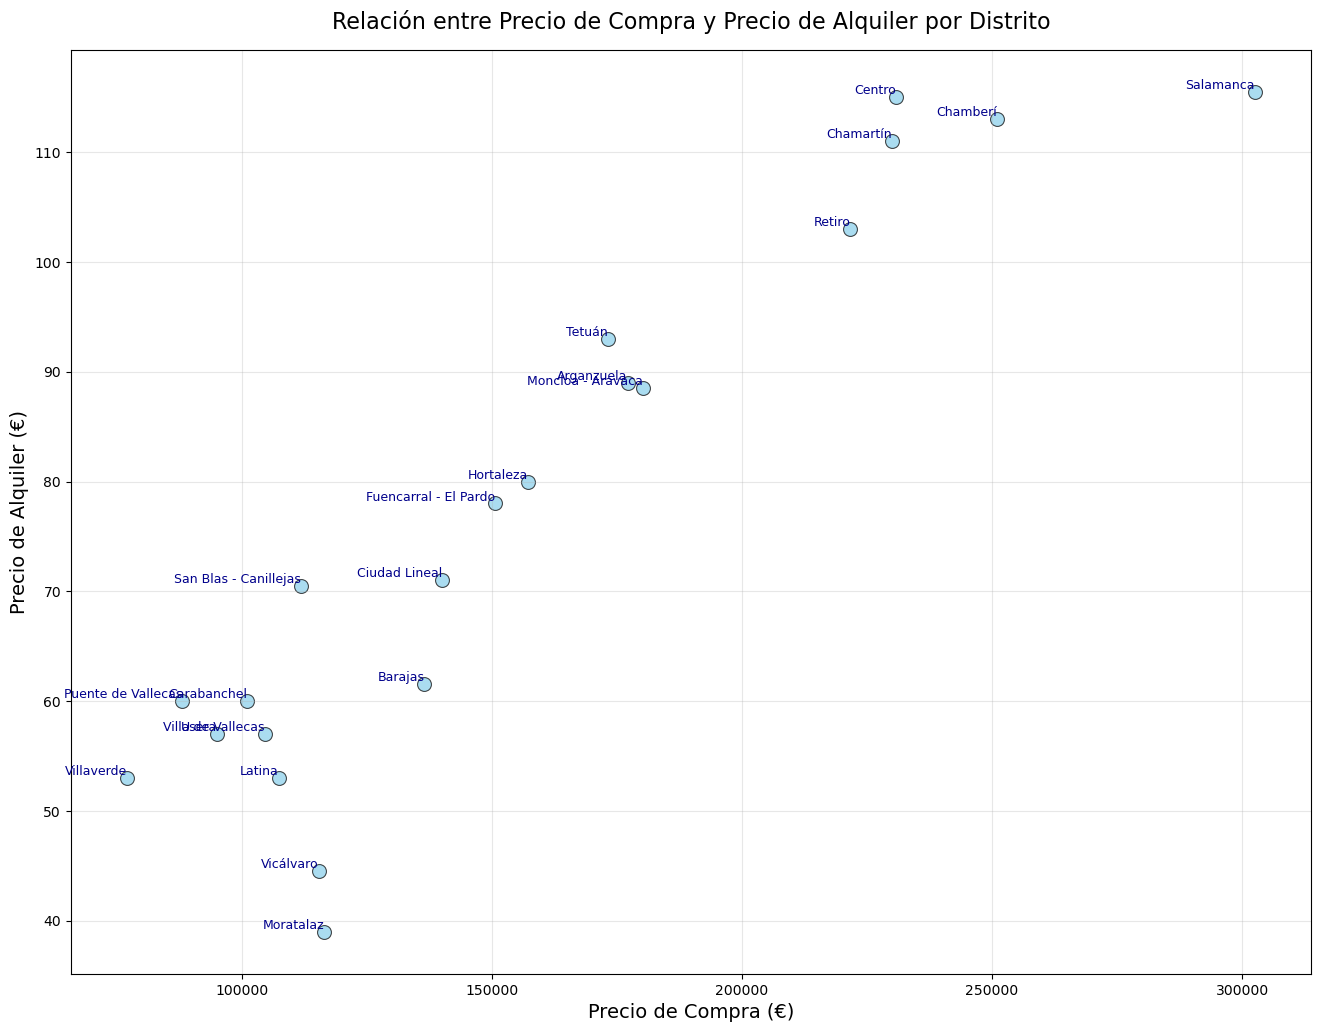

In [182]:
# Configuración de la figura
plt.figure(figsize=(16, 12))

# Gráfico scatterplot con seaborn
sns.scatterplot(data=temp, x='precio_compra', y='precio_total', s=100, color='skyblue', alpha=0.7, edgecolor='black')

# Añadir etiquetas directamente
for i in range(temp.shape[0]):
    plt.text(
        temp.precio_compra.iloc[i],  # Coordenada X
        temp.precio_total.iloc[i],  # Coordenada Y
        temp.index[i],              # Texto (nombre del distrito)
        fontsize=9,                 # Tamaño del texto
        ha='right',                 # Alineación horizontal
        va='bottom',                # Alineación vertical
        color='darkblue'            # Color del texto
    )

# Mejoras en los ejes y título
plt.title("Relación entre Precio de Compra y Precio de Alquiler por Distrito", fontsize=16, pad=15)
plt.xlabel("Precio de Compra (€)", fontsize=14)
plt.ylabel("Precio de Alquiler (€)", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Hay que destacar **San Blas - Canillejas, Tetuán y Centro**, cada uno en un cluster diferente

Vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [183]:
temp2 = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp2

precio_total  precio_compra
neighbourhood                             
Abrantes               45.0       101115.0
Acacias                89.0       177170.0
Adelfas               114.0       221655.0
Aeropuerto             55.0       136535.0
Aguilas                40.0       107380.0
...                     ...            ...
Valverde               85.0       150675.0
Ventas                 60.0       140070.0
Vinateros              34.0       116445.0
Vista Alegre           56.0       101115.0
Zofío                  59.5        95165.0

[128 rows x 2 columns]

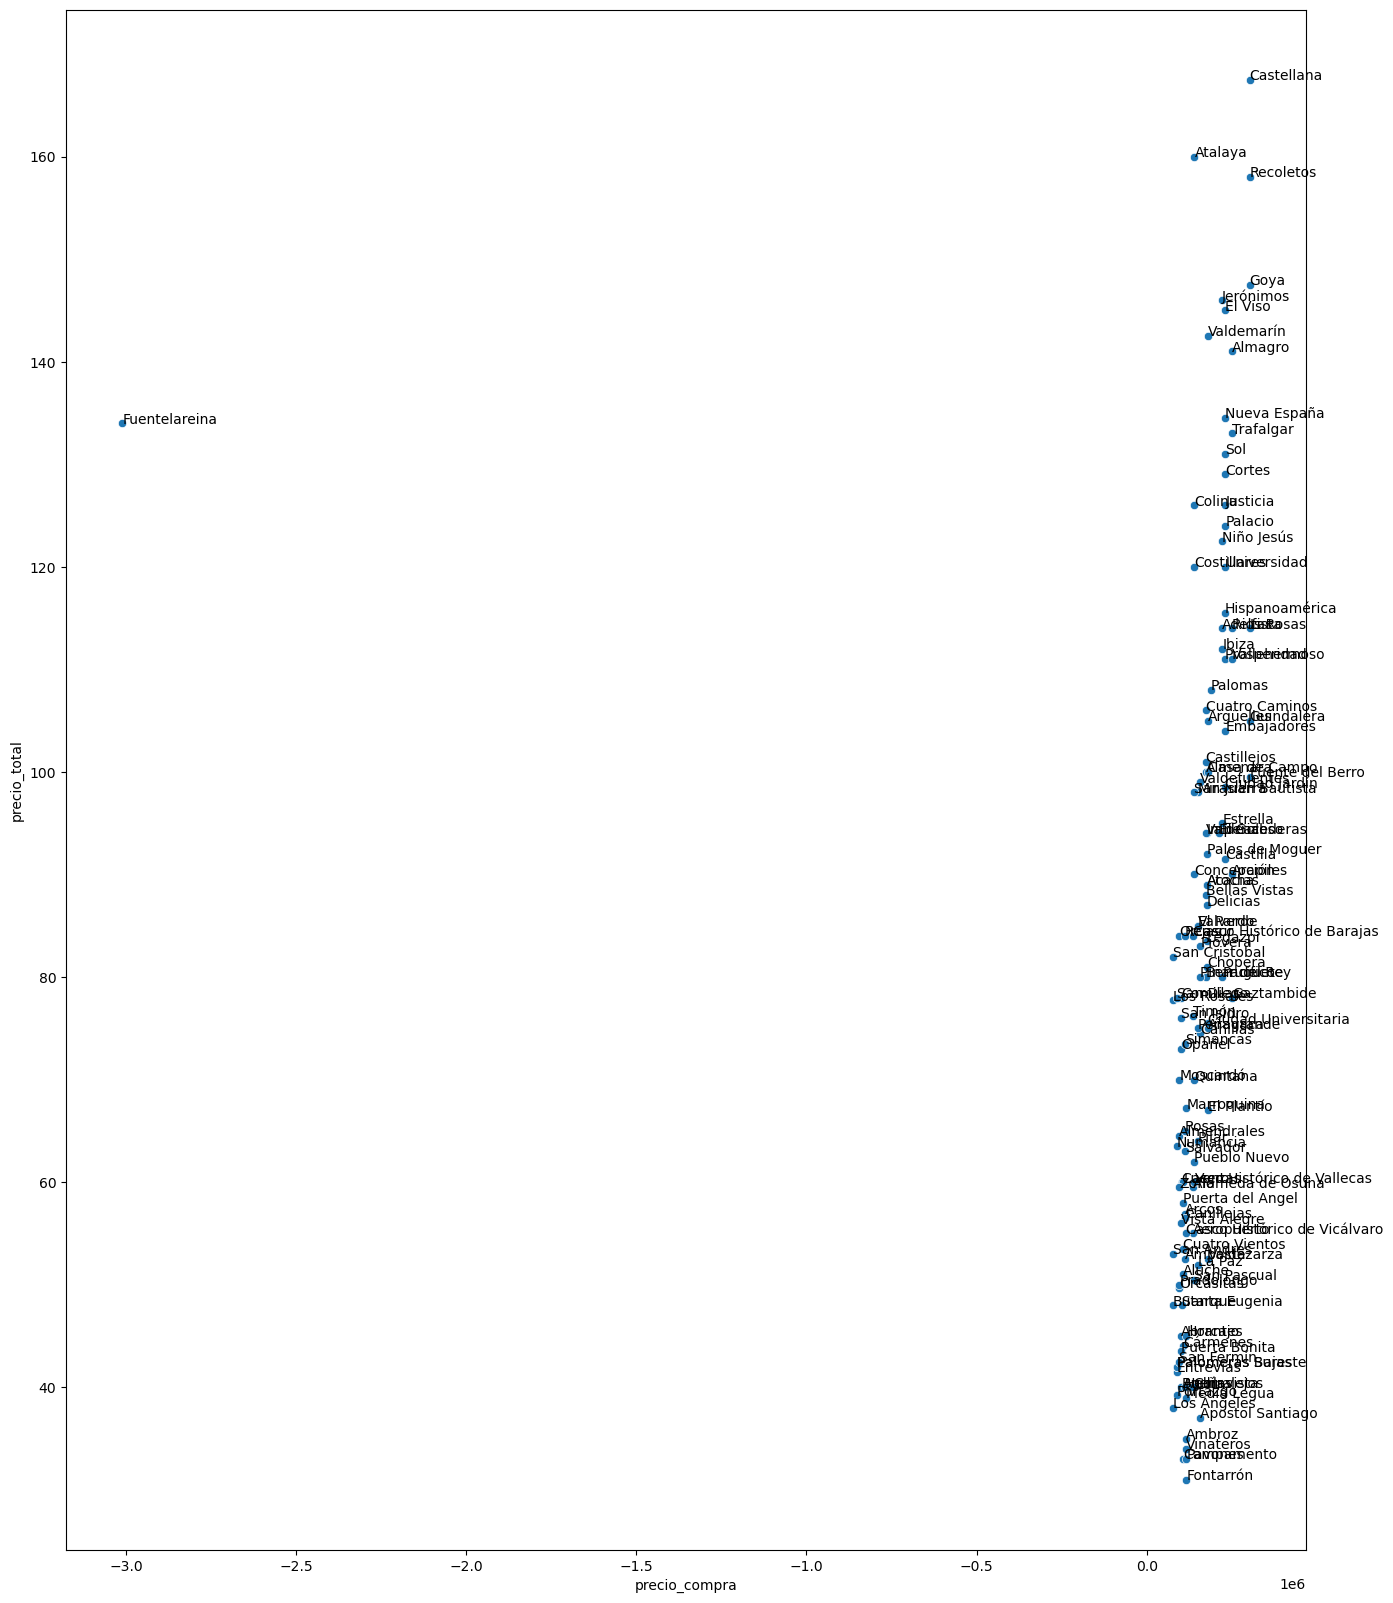

In [184]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp2, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp2.shape[0]):
    plt.text(temp2.precio_compra.iloc[cada], temp2.precio_total.iloc[cada], temp2.index[cada])

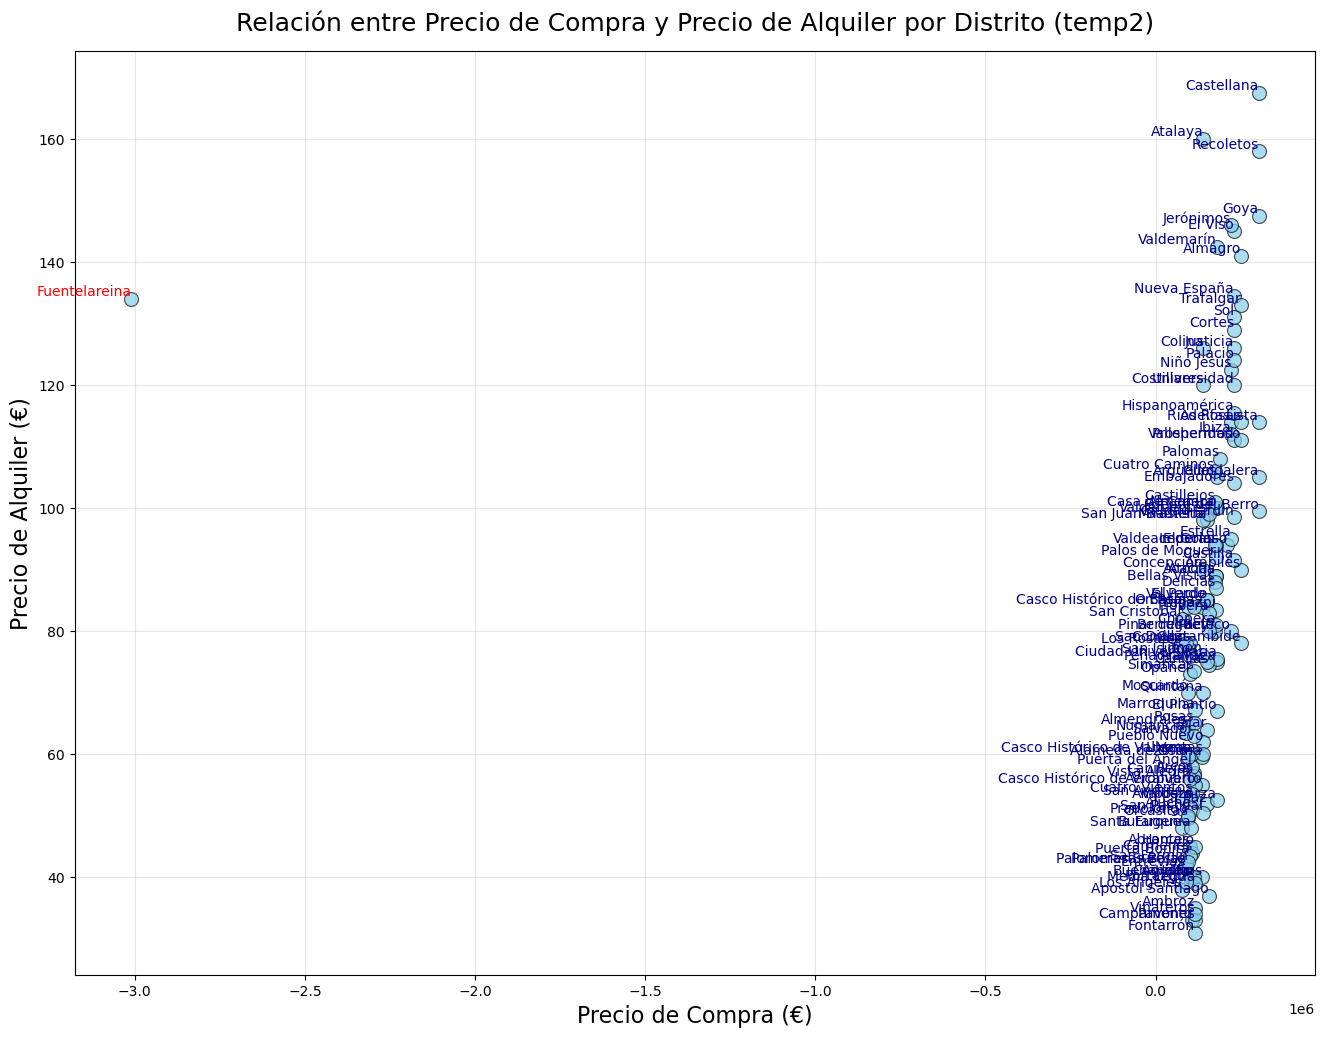

In [185]:
# Gráfico scatterplot con puntos y posible etiquetado del distrito atípico
plt.figure(figsize=(16, 12))
sns.scatterplot(data=temp2, x='precio_compra', y='precio_total', s=100, color='skyblue', alpha=0.7, edgecolor='black')

# Añadir etiqueta al distrito atípico
for i in range(temp2.shape[0]):
    if temp2.index[i] == 'Fuentelareina':  # Identificando distrito atípico
        plt.text(
            temp2.precio_compra.iloc[i],  
            temp2.precio_total.iloc[i],  
            temp2.index[i],              
            fontsize=10,                
            ha='right',                 
            va='bottom',                
            color='red'                 # Resaltando el distrito atípico
        )
    else:
        plt.text(
            temp2.precio_compra.iloc[i],  
            temp2.precio_total.iloc[i],  
            temp2.index[i],              
            fontsize=10,                
            ha='right',                 
            va='bottom',                
            color='darkblue'
        )

# Mejoras en los ejes y título
plt.title("Relación entre Precio de Compra y Precio de Alquiler por Distrito (temp2)", fontsize=18, pad=15)
plt.xlabel("Precio de Compra (€)", fontsize=16)
plt.ylabel("Precio de Alquiler (€)", fontsize=16)
plt.grid(alpha=0.3)

plt.show()


In [186]:
temp2[temp2.index == 'Fuentelareina']

precio_total  precio_compra
neighbourhood                             
Fuentelareina         134.0     -3010486.5

In [187]:
temp2 = temp2[temp2.index != 'Fuentelareina']

Como es un error atípico, elimino Fuentelareina

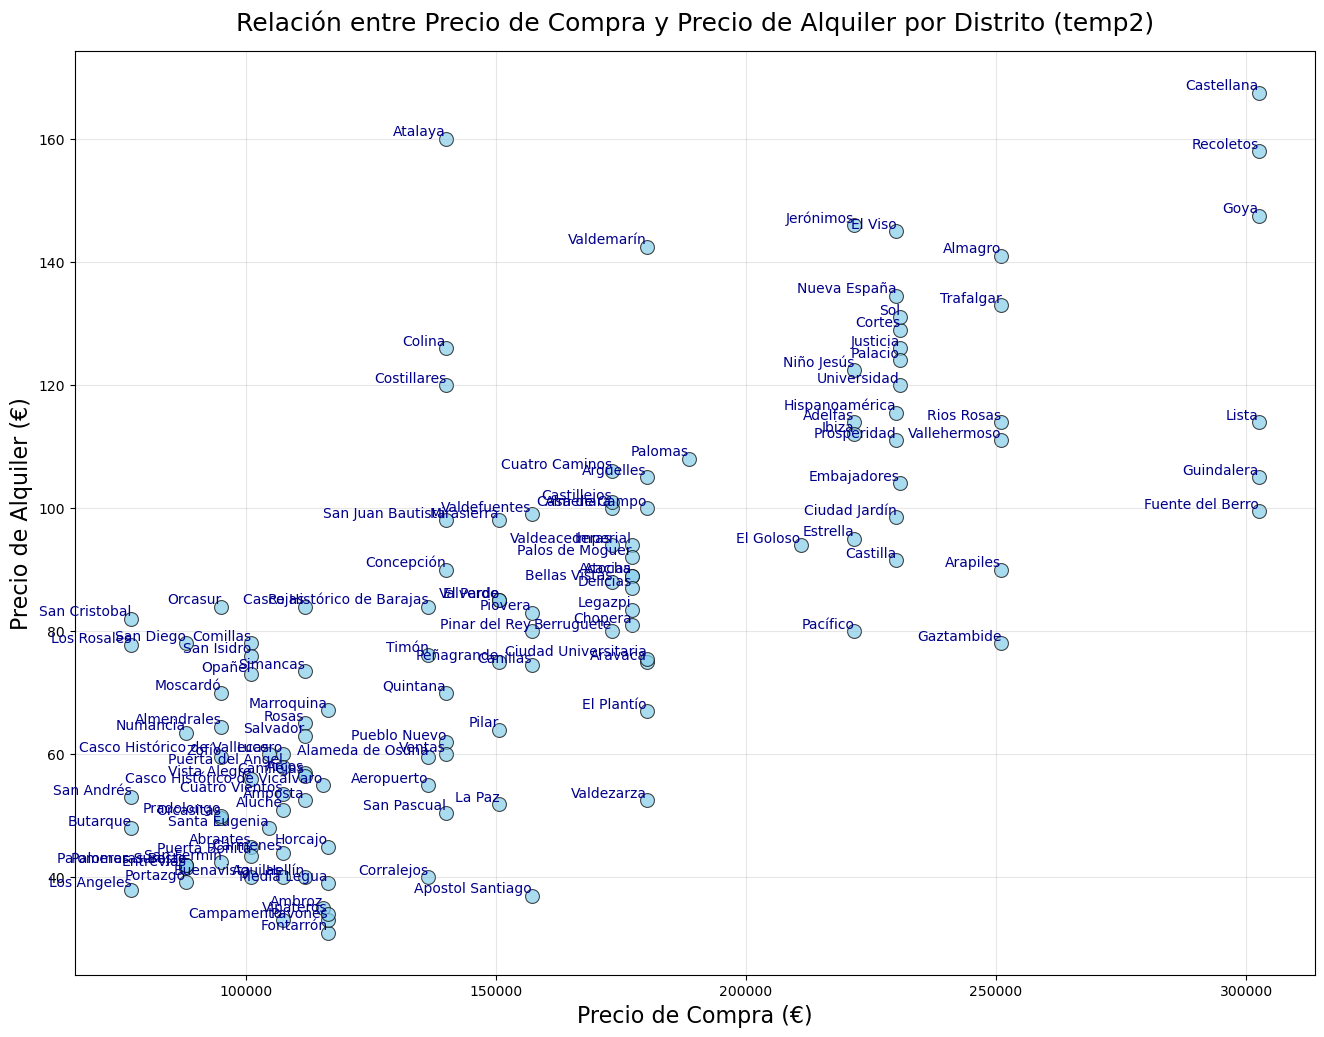

In [188]:
# Gráfico scatterplot con puntos y posible etiquetado del distrito atípico
plt.figure(figsize=(16, 12))
sns.scatterplot(data=temp2, x='precio_compra', y='precio_total', s=100, color='skyblue', alpha=0.7, edgecolor='black')

# Añadir etiqueta al distrito atípico
for i in range(temp2.shape[0]):
    if temp2.index[i] == 'Fuentelareina':  # Identificando distrito atípico
        plt.text(
            temp2.precio_compra.iloc[i],  
            temp2.precio_total.iloc[i],  
            temp2.index[i],              
            fontsize=10,                
            ha='right',                 
            va='bottom',                
            color='red'                 # Resaltando el distrito atípico
        )
    else:
        plt.text(
            temp2.precio_compra.iloc[i],  
            temp2.precio_total.iloc[i],  
            temp2.index[i],              
            fontsize=10,                
            ha='right',                 
            va='bottom',                
            color='darkblue'
        )

# Mejoras en los ejes y título
plt.title("Relación entre Precio de Compra y Precio de Alquiler por Distrito (temp2)", fontsize=18, pad=15)
plt.xlabel("Precio de Compra (€)", fontsize=16)
plt.ylabel("Precio de Alquiler (€)", fontsize=16)
plt.grid(alpha=0.3)

plt.show()


**Insight 1: Oportunidades por Segmento de Precio**
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: **Colina, Costillares y San Juan Bautista**
        *  El barrio **Atalaya** en Ciudad Lineal presenta un precio de compra bajo en proporción a su precio de alquiler, pero presenta un registro único en el dataset. Esto podría indicar una oportunidad en un mercado poco desarrollado. Sin embargo, se requiere mayor información para confirmar este hallazgo.
    * Medio: **Jerónimos, El viso**
    * Medio-Alto: **Almagro y Trafalgar**

In [189]:
#Grupo bajo
df[df['neighbourhood'] == "Colina"]['neighbourhood_group'].unique().tolist()

['Ciudad Lineal']

In [190]:
#Grupo bajo
df[df['neighbourhood'] == "Costillares"]['neighbourhood_group'].unique().tolist()

['Ciudad Lineal']

In [191]:
#Grupo bajo
df[df['neighbourhood'] == "Valdemarín"]['neighbourhood_group'].unique().tolist()

['Moncloa - Aravaca']

In [192]:
#Grupo bajo
df[df['neighbourhood'] == "Atalaya"]['neighbourhood_group'].unique().tolist()

['Ciudad Lineal']

In [193]:
#Grupo medio
df[df['neighbourhood'] == "Jerónimos"]['neighbourhood_group'].unique().tolist()

['Retiro']

In [194]:
#Grupo medio
df[df['neighbourhood'] == "El Viso"]['neighbourhood_group'].unique().tolist()

['Chamartín']

In [195]:
#Grupo medio-Alto
df[df['neighbourhood'] == "Almagro"]['neighbourhood_group'].unique().tolist()

['Chamberí']

In [196]:
#Grupo medio-Alto
df[df['neighbourhood'] == "Trafalgar"]['neighbourhood_group'].unique().tolist()

['Chamberí']

**Insight 2: Distribución Geográfica de los Barrios Destacados**

Encontramos que están distribuidos entre cinco distritos principales:

* **Ciudad Lineal**: 4 barrios (Atalaya, Colina, Costillares, San Juan Bautista)
* **Chamberí**: 2 barrios (Almagro, Trafalgar)
* **Retiro**: 1 barrio (Jerónimos)
* **Chamartín**: 1 barrio (El Viso)

**Concentración en Ciudad Lineal**: Este distrito lidera con cuatro barrios destacados, **todos dentro del segmento de precios bajos**, lo que podría indicar un mercado asequible con potencial para inversión.

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

Un minicubo puede representarse como una tabla o conjunto de tablas que desglosan los datos según las dimensiones y variables discretizadas relevantes.

In [197]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

bedrooms_disc accommodates_disc beds_disc number_of_reviews_disc  \
0            01_Una               0-3         1                    1-4   
1            01_Una               0-3         1                    1-4   
2            01_Una               0-3         1                    1-4   
3            01_Una               0-3         1                    1-4   
4            01_Una               0-3         1                    1-4   
...             ...               ...       ...                    ...   
24905        01_Una               0-3         1                    1-4   
24906        01_Una               0-3         1                    1-4   
24907        01_Una               0-3         1                   5-48   
24908        01_Una               0-3         1                    1-4   
24909        01_Una               0-3         1                    1-4   

       precio_total  precio_compra  
0              77.0       230790.0  
1              54.0       230790.0  
2              55.0       111790.0  
3              69.0       230790.0  
4             200.0       140070.0  
...             ...            ...  
24905          50.0        88130.0  
24906          55.0       157150.0  
24907          50.0       101115.0  
24908          35.0        88130.0  
24909          31.0       136535.0  

[24910 rows x 6 columns]

In [198]:
#Paso 2: pasar a transaccional las dimensiones, manteniendo las métricas como el id
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

precio_total  precio_compra                variable   value
0              77.0       230790.0           bedrooms_disc  01_Una
1              54.0       230790.0           bedrooms_disc  01_Una
2              55.0       111790.0           bedrooms_disc  01_Una
3              69.0       230790.0           bedrooms_disc  01_Una
4             200.0       140070.0           bedrooms_disc  01_Una
...             ...            ...                     ...     ...
99635          50.0        88130.0  number_of_reviews_disc     1-4
99636          55.0       157150.0  number_of_reviews_disc     1-4
99637          50.0       101115.0  number_of_reviews_disc    5-48
99638          35.0        88130.0  number_of_reviews_disc     1-4
99639          31.0       136535.0  number_of_reviews_disc     1-4

[99640 rows x 4 columns]

In [199]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
accommodates_disc      0-3                      63.0       221655.0
                       4                       117.0       230790.0
                       5-16                    150.0       323106.0
bedrooms_disc          -999                     96.0     -4611184.2
                       01_Una                   78.0       230790.0
                       02_Dos                  137.0       323106.0
                       03_Tres                 150.0       414099.0
                       04_Cuatro_o_mas         175.0       553896.0
beds_disc              1                        67.0       221655.0
                       2                       115.0       230790.0
                       3-24                    144.0       323106.0
number_of_reviews_disc 1-4                      92.0       230790.0
                       49-744                  105.0       230790.0
                       5-48                    100.0       230790.0

Sobre el minicubo vamos analizando cada variable.

In [200]:
minicubo_precio.loc['bedrooms_disc'].iloc[1:]

precio_total  precio_compra
value                                       
01_Una                   78.0       230790.0
02_Dos                  137.0       323106.0
03_Tres                 150.0       414099.0
04_Cuatro_o_mas         175.0       553896.0

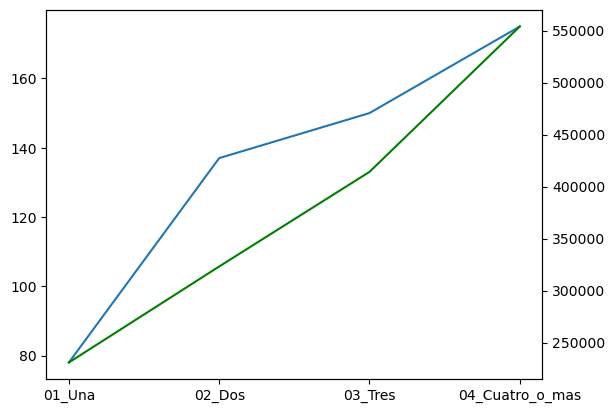

In [201]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].iloc[1:].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].iloc[1:].precio_compra,color = 'green');

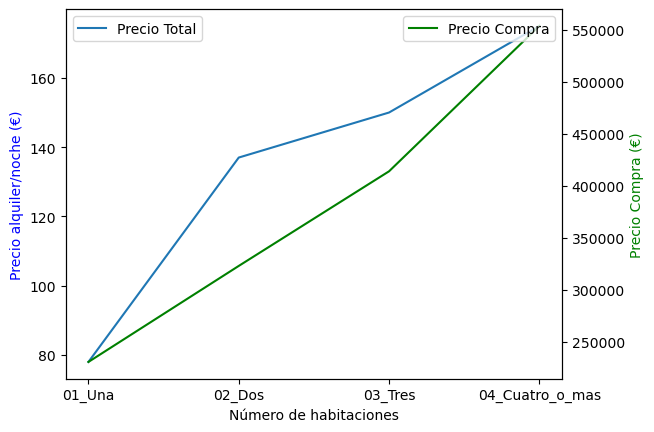

In [202]:
import matplotlib.pyplot as plt

# Crear gráfico
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].iloc[1:].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].iloc[1:].precio_compra, color='green')

# Etiquetas para los ejes
ax.set_xlabel('Número de habitaciones')
ax.set_ylabel('Precio alquiler/noche (€)', color='blue')
ax2.set_ylabel('Precio Compra (€)', color='green')

# Mostrar leyenda
ax.legend(['Precio Total'], loc='upper left')
ax2.legend(['Precio Compra'], loc='upper right')

# Mostrar gráfico
plt.show()


In [203]:
minicubo_precio.loc['beds_disc']

precio_total  precio_compra
value                             
1              67.0       221655.0
2             115.0       230790.0
3-24          144.0       323106.0

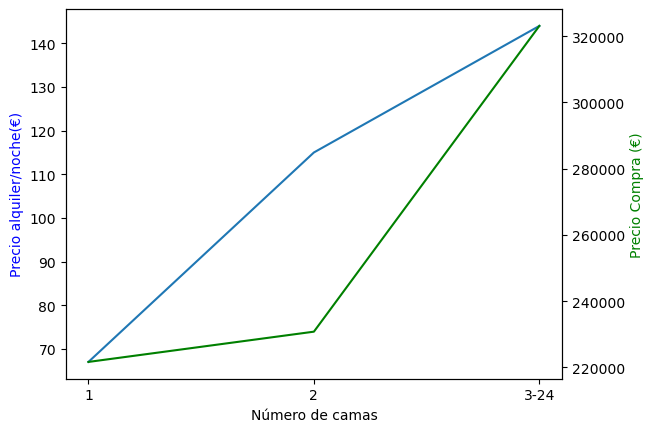

In [204]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green')

# Etiquetas para los ejes
ax.set_xlabel('Número de camas')
ax.set_ylabel('Precio alquiler/noche(€)', color='blue')
ax2.set_ylabel('Precio Compra (€)', color='green');

**Insight 3: Número de habitaciones y camas**

* Las inmuebles de **2 habitaciones** presentan la mejor relación entre el costo de compra y el ingreso por noche de alquiler turístico.
* Los inmuebles con **2 camas** presentan la mejor relación entre el costo de compra y el ingreso por noche de alquiler turístico.

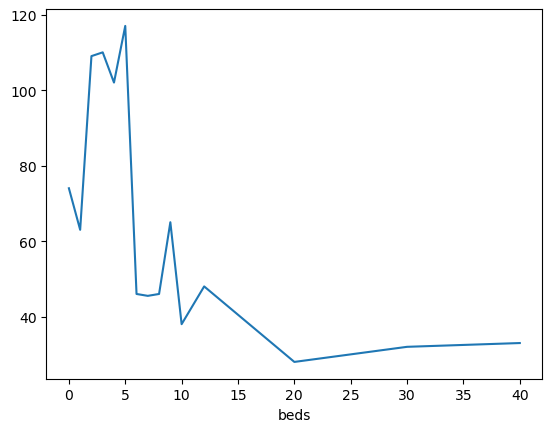

In [205]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

In [206]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

level_0  index                   id  \
1168      1168   1168   609912450623640129   
1245      1245   1245   644726267441640007   
1252      1252   1252   682390524307350727   
4183      4183   4183   681807241664662257   
5421      5421   5421   600789912630118943   
6934      6934   6934  1011010211143042553   
8867      8867   8867  1011554774276353687   
8991      8991   8991  1015759084197790290   
9074      9074   9074   830236986336763651   
9079      9079   9079  1015771752892144594   
10111    10111  10111  1010918249504988389   
10500    10500  10500   678839511440564589   
10651    10651  10651  1011549716939872540   
10654    10654  10654   830212184878722243   
10810    10810  10810   831925213610287553   
11516    11516  11516   590309986337177910   
11651    11651  11651  1177325975609874358   
12220    12220  12220   989095512319485837   
16287    16287  16287  1046881460625123152   
17219    17219  17219             40871059   
21018    21018  21018             46416127   
22677    22677  22677   927528844340187037   

                                                    name    host_id  \
1168          Cama en Habitación compartida  12 personas  453229690   
1245                  habitación compartida.12 Personas.  453229690   
1252   CAMA EN HABITACIÓN COMPARTIDA 6 HUESPEDES MUJE...  453229690   
4183            CAMA EN HABITACIÓN COMPARTIDA 10PERSONAS  453229690   
5421          Cama en habitación compartida x 10 (mixta)  453229690   
6934   3 Camas en hab. compartida-baño privado, 6 lit...  493916828   
8867   5 Camas en hab. compartida-baño privado, 6 lit...  493916828   
8991   3 Camas en hab. compartida-baño privado, 6 lit...  493916828   
9074   2 Camas en hab. compartida-baño privado, 5 lit...  493916828   
9079   4 Camas en hab. compartida-baño privado, 6 lit...  493916828   
10111  2 Camas en hab. compartida-baño privado, 6 lit...  493916828   
10500                                      Cápsula Doble  451189684   
10651  4 Camas en hab. compartida-baño privado, 6 lit...  493916828   
10654  3 Camas en hab. compartida-baño privado, 5 lit...  493916828   
10810  2 Camas en hab. compartida-baño privado, 5 lit...  493916828   
11516                                 Cápsula Individual  451189684   
11651     Cama en Habitación Mixta de 18 en TLH Lavapiés  568187402   
12220  2 Camas en hab. compartida-baño privado, 6 lit...  493916828   
16287                    Cama en dormitorio compartido 8  550955957   
17219                   8 Bed Mixed Dorm Shared Bathroom  314662107   
21018     Madrid Center: Puerta del Sol, Tirso de Molina   38098725   
22677                           Habitación de Matrimonio  421999208   

      neighbourhood_group    neighbourhood   latitude  longitude  \
1168               Centro      Universidad  40.422730  -3.703310   
1245               Centro      Universidad  40.421320  -3.703090   
1252               Centro      Universidad  40.420970  -3.703530   
4183               Centro      Universidad  40.422270  -3.702820   
5421               Centro      Universidad  40.422500  -3.704960   
6934               Centro      Universidad  40.422240  -3.702870   
8867               Centro      Universidad  40.422597  -3.704498   
8991               Centro      Universidad  40.421891  -3.703881   
9074               Centro      Universidad  40.421891  -3.703881   
9079               Centro      Universidad  40.421891  -3.703881   
10111              Centro      Universidad  40.421010  -3.703130   
10500              Centro      Embajadores  40.413121  -3.704288   
10651              Centro      Universidad  40.421891  -3.703881   
10654              Centro      Universidad  40.421891  -3.703881   
10810              Centro      Universidad  40.421891  -3.703881   
11516              Centro      Embajadores  40.413480  -3.703170   
11651              Centro      Embajadores  40.410065  -3.700555   
12220              Centro      Universidad  40.421891  -3.703881   
16287          Arganzu

In [207]:
minicubo_precio.loc['accommodates_disc']

precio_total  precio_compra
value                             
0-3            63.0       221655.0
4             117.0       230790.0
5-16          150.0       323106.0

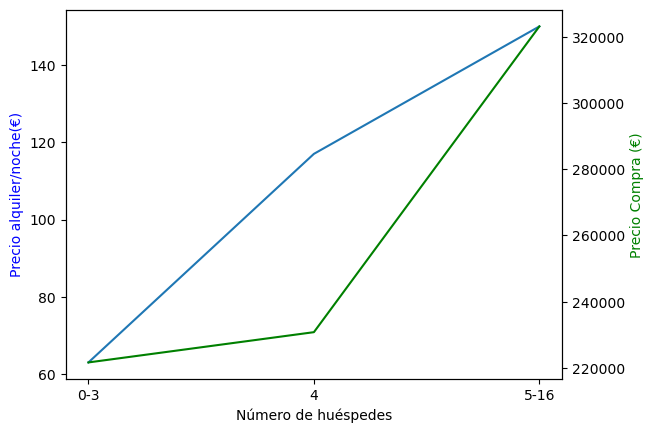

In [208]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green')

# Etiquetas para los ejes
ax.set_xlabel('Número de huéspedes')
ax.set_ylabel('Precio alquiler/noche(€)', color='blue')
ax2.set_ylabel('Precio Compra (€)', color='green');

**Insight 4: Número de huéspedes**
* El número óptimo de huéspedes está en 3,  ya que el precio de los inmuebles para acomodar hasta 3 huéspedes es similar al de 1 o 2, mientras que el ingreso por noche aumenta.

Por último vamos a analizar la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En una situación real hubiéramos construído muchas de este tipo, y repetido el análisis con todas.

En este caso como hemos construído la distancia a la Puerta del Sol vamos a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos.

Para ello primero vamos a calcular la distancia media por distrito y elegir un punto de corte.

In [209]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.738818
Arganzuela                1.824786
Moncloa - Aravaca         2.004574
Chamberí                  2.099758
Retiro                    2.448509
Salamanca                 2.895426
Latina                    3.249791
Carabanchel               3.611614
Usera                     3.874419
Puente de Vallecas        4.266234
Chamartín                 4.414702
Tetuán                    4.646134
Moratalaz                 5.019390
Ciudad Lineal             5.129630
Fuencarral - El Pardo     7.542361
Villaverde                7.625459
Hortaleza                 7.925943
San Blas - Canillejas     8.108111
Vicálvaro                 8.562065
Villa de Vallecas         8.966843
Barajas                  11.576678
Name: pdi_sol, dtype: float64

Vamos a cortar en Latina incluído.

Y sobre esa selección vamos a visualizar con un scatter.

In [210]:
df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Moncloa - Aravaca',
 'Chamberí',
 'Retiro',
 'Salamanca',
 'Latina']

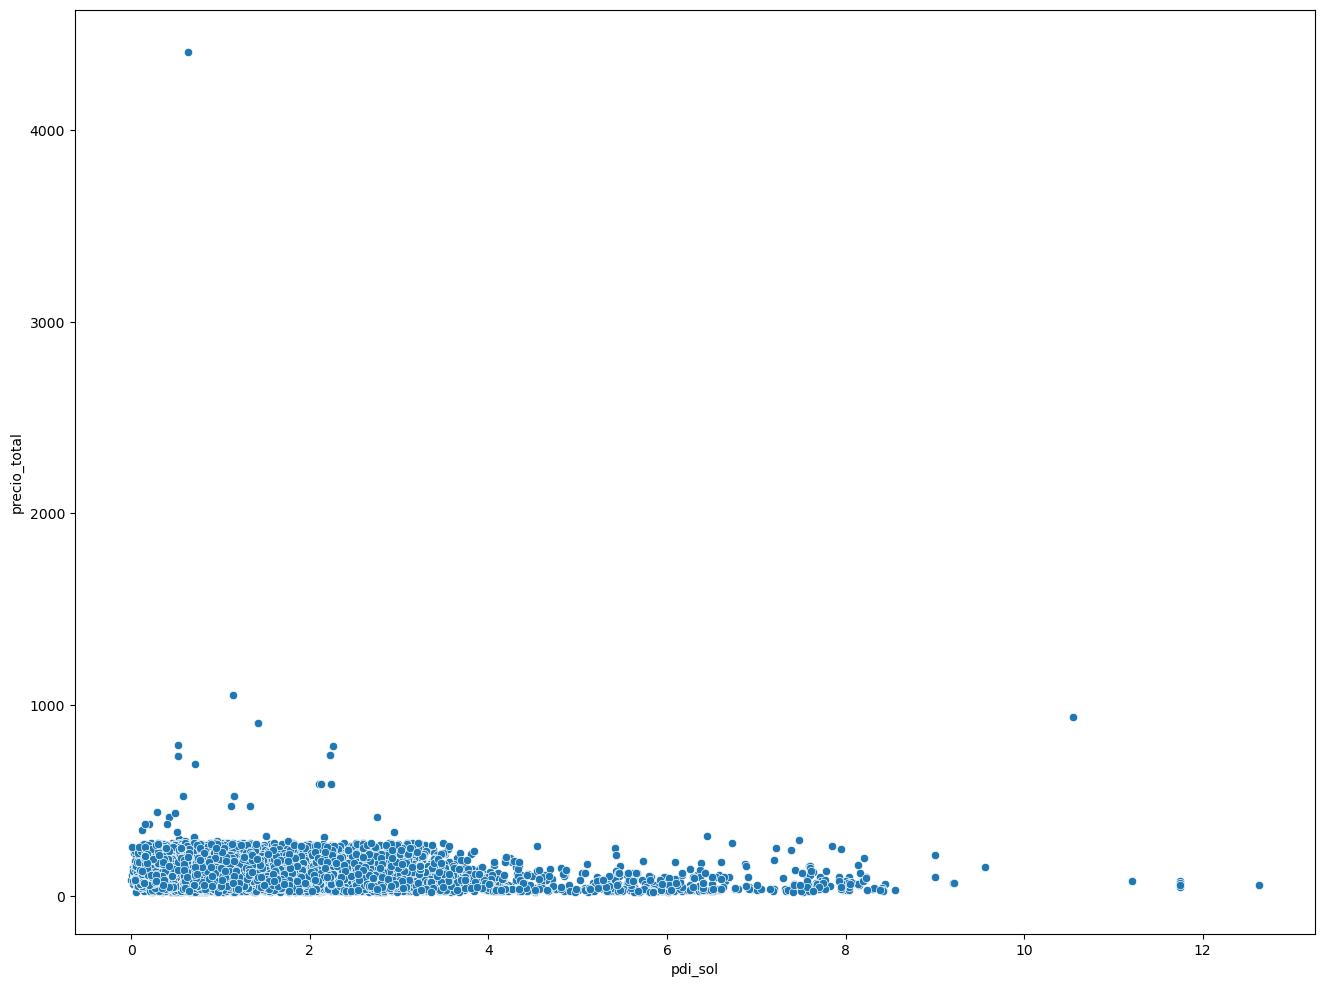

In [211]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: Puntos de Interés**
* La cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del Punto de Interés y por tanto esperablemente tengan un precio de compra menor

### Analisis sobre la ocupación

Para este punto podríamos repetir exactamente los mismos análisis que con el precio pero cambiando la variable precio por la de ocupación que habíamos construido.

Dado que sería igual no vamos a desarrollarlo y te lo dejo como tarea para que practiques e intentes obtener tus primeros insights.

En su lugar prefiero el tiempo para enseñarte cómo podemos incluir análisis sobre un mapa, dado que en este caso sería algo muy relevante y es un tipo de análisis que siempre gusta mucho.

### Analisis geográfico sobre un mapa

El análisis geográfico es una disciplina en si misma y de bastante complejidad.

Pero afortunadamente hay una alternativa en Python que lo hace muy sencillo y cubre todo lo que necesitamos de forma práctica para nuestro fin.

Es un paquete que se llama Folium y es una implementación de la tecnología Leaflet en Python.

Lo único que necesitamos para usarlo es tener las coordenadas de latitud y longitud.

In [212]:
import folium

In [213]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

Por ejemplo vamos a analizar visualmente el insight sobre el distrito de **Ciudad Lineal**.

In [214]:
datos = df[df.distrito == 'Ciudad Lineal'].copy()

Para representar los marcadores de todos los pisos tenemos que crear un bucle para ir añadiéndolos al mapa.

In [215]:
datos = datos[datos['precio_compra'] >= 0]

In [216]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.Marker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_compra'],
   ).add_to(mapa)

mapa

Esta representación está bien, pero tenemos que ir haciendo click en cada uno para ver el precio.

Sería más fácil si tuviéramos un código de colores que nos indicara visualmente el rango de precio.

Para ello vamos a crear una nueva variable discretizada y **cambiaremos el marcador a un círculo de colores.**

In [217]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['green', 'yellow', 'orange', 'red'])

In [218]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for indice, fila in datos.iterrows():
    folium.CircleMarker(
        location=[fila['latitude'], fila['longitude']],  # Usar fila para acceder a las columnas
        popup=fila['precio_total'],                     # Usar fila para 'precio_total'
        fill=True,
        color=fila['precio_total_disc'],                # Usar fila para 'precio_total_disc'
        radius=5
    ).add_to(mapa)

mapa

In [219]:
datos['precio_compra'].value_counts()

precio_compra
140070.0    613
196098.0    163
252126.0     56
336168.0      6
420210.0      3
Name: count, dtype: int64

In [220]:
datos['color'] = pd.cut(datos['precio_compra'], 
                       bins=[0, 140070, 196098, 252126, 420210],
                       labels=['green', 'yellow', 'orange', 'red'],
                       include_lowest=True)

In [221]:
mapa2 = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

In [222]:
for indice, fila in datos.iterrows():
    folium.CircleMarker(
        location=[fila['latitude'], fila['longitude']],
        radius=5,
        fill=True,
        fill_color=fila['color'],  # Usa el color categorizado
        color=fila['color'],      # Borde del círculo (opcional)
        popup=f"Precio: {fila['precio_compra']}€"
    ).add_to(mapa2)

In [223]:
mapa2

**Insight 6: Concentración y precios en Ciudad Lineal**
* Existe una clara diferenciación de precios, donde las propiedades más caras (marcadores rojos y naranjas, 252,126€ - 420,210€) se encuentran dispersas en las ubicaciones que se acercan al distrito de Chamartín.
* Comparando con el mapa de precio_total y precio_compra, es interesante buscar los inmuebles situados en el barrio de **San Juan Bautista**

In [224]:
datos

level_0  index                   id  \
4            4      4             49895335   
7            7      7             33249881   
10          10     10             48991692   
26          26     26             29023627   
29          29     29             54138240   
...        ...    ...                  ...   
24751    24751  24751  1217979288465915406   
24835    24835  24835   835534650307344211   
24839    24839  24839  1081743171485459295   
24841    24841  24841             17370243   
24896    24896  24896  1051480397972133254   

                                             name    host_id  \
4                                           Teste   86662970   
7                      Ambiente familiar y cálido  250360759   
10          Habitación en Ventas con baño privado  236357316   
26         Apartamento completo C/ Alcala -Madrid  218735767   
29                        Precioso piso en madrid  438896829   
...                                           ...        ...   
24751                       Alojamiento en Madrid  499050435   
24835                  Habitación cerca del metro  502926904   
24839                        Habitación en Madrid  559773014   
24841  Madrid without noise or pollution. GQ22 3º  116196433   
24896             Estudio a estrenar con vestidor  495666470   

      neighbourhood_group      neighbourhood   latitude  longitude  \
4           Ciudad Lineal  San Juan Bautista  40.453560  -3.656380   
7           Ciudad Lineal       Pueblo Nuevo  40.427260  -3.641420   
10          Ciudad Lineal             Ventas  40.430800  -3.659340   
26          Ciudad Lineal           Quintana  40.436730  -3.641740   
29          Ciudad Lineal             Ventas  40.432220  -3.653260   
...                   ...                ...        ...        ...   
24751       Ciudad Lineal         Concepción  40.440250  -3.644663   
24835       Ciudad Lineal       Pueblo Nuevo  40.434127  -3.642679   
24839       Ciudad Lineal           Quintana  40.437650  -3.642160   
24841       Ciudad Lineal         Concepción  40.444970  -3.641980   
24896       Ciudad Lineal       Pueblo Nuevo  40.427386  -3.637842   

             room_type  price  minimum_nights  calculated_host_listings_count  \
4         Private room    200               1                               1   
7      Entire home/apt     91               1                               1   
10        Private room     40              90                               4   
26     Entire home/apt     93               2                               1   
29     Entire home/apt     90               1                               1   
...                ...    ...             ...                             ...   
24751     Private room     32               1                               1   
24835     Private room     30               1                               1   
24839     Private room     43               1                               1   
24841  Entire home/apt     78               7                               5   
24896  Entire home/apt     92               2                              13   

       availability_365                                        description  \
4                   365                                    Sin descripción   
7                     0                                    Sin descripción   
10                   89                                    Sin descripción   
26                   95  FREE COVID 19, WELLISAIR, AIR and SURFACE PURI...   
29                   35  Enjoy the simplicity of this quiet and central...   
...                 ...                                                ...   
24751               329  Welcome to Madrid<br />🌆We offer you a room in...   
24835               365                                    Sin descripción   
24839               269  Enjoy luxury experience in this central home. ...   
24841                63  In Madrid (Arturo Soria), in a residential are...   
24896        

In [226]:
datos['invertir'] = np.where(
    (datos['precio_total_disc'] == 'red') & (datos['color'] == 'green'),
    True,
    False
)

In [227]:
# Filtra los datos donde 'invertir' es True
datos_invertir = datos[datos['invertir'] == True]

# Crea un mapa centrado en tu ubicación de interés
mapa3 = folium.Map(location=[40.4167278, -3.7033387], zoom_start=12)

# Agrega los puntos al mapa
for _, fila in datos_invertir.iterrows():
    folium.CircleMarker(
        location=[fila['latitude'], fila['longitude']],
        radius=5,  # Ajusta el tamaño si es necesario
        fill=True,
        color='green',  # Puedes cambiar el color o basarte en alguna variable
        fill_opacity=0.8,
        popup=f"Precio Total: {fila['precio_total']}€"  # Ajusta el contenido del popup
    ).add_to(mapa3)

# Mostrar el mapa
mapa3
